importing libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [55]:
data = pd.read_csv('Sleep_Efficiency.csv', parse_dates=True, index_col='ID')

TARGET = 'Sleep efficiency'
sleep_efficiency = data[TARGET]
data = data.drop(TARGET, axis=1)
data['Sleep efficiency'] = sleep_efficiency

TIME = ['Bedtime', 'Wakeup time']
for x in TIME :
    data[x] = pd.to_datetime(data[x], format='%Y-%m-%d %H:%M:%S')
    
data.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
ID,,,,,,,,,,,,,,
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,18,70,10,0.0,0.0,0.0,Yes,3.0,0.88
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,24,28,53,3.0,0.0,3.0,Yes,3.0,0.66
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,20,70,10,1.0,0.0,0.0,No,3.0,0.89
4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,28,25,52,3.0,50.0,5.0,Yes,1.0,0.51
5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,27,55,18,3.0,0.0,3.0,No,3.0,0.76


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 1 to 452
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age                     452 non-null    int64         
 1   Gender                  452 non-null    object        
 2   Bedtime                 452 non-null    datetime64[ns]
 3   Wakeup time             452 non-null    datetime64[ns]
 4   Sleep duration          452 non-null    float64       
 5   REM sleep percentage    452 non-null    int64         
 6   Deep sleep percentage   452 non-null    int64         
 7   Light sleep percentage  452 non-null    int64         
 8   Awakenings              432 non-null    float64       
 9   Caffeine consumption    427 non-null    float64       
 10  Alcohol consumption     436 non-null    float64       
 11  Smoking status          452 non-null    object        
 12  Exercise frequency      446 non-null    float64   

visualization

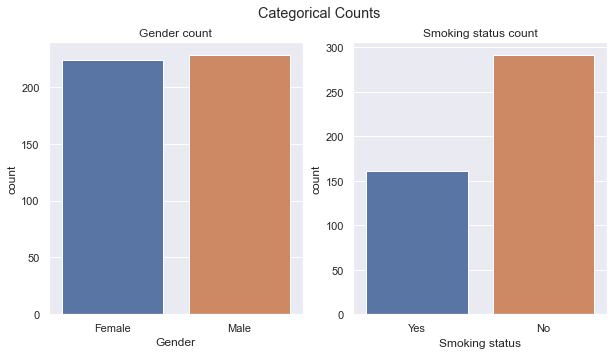

In [57]:
# categorical

CATEGORICAL = list(data.select_dtypes(include='object').columns)
size = len(CATEGORICAL)

fig, ax = plt.subplots(1,size, figsize=(10,5))
fig.suptitle('Categorical Counts')

for num, column in enumerate(CATEGORICAL) :
    sns.countplot(x = data[column], ax=ax[num]) # balanced
    ax[num].set_title(f'{column} count')

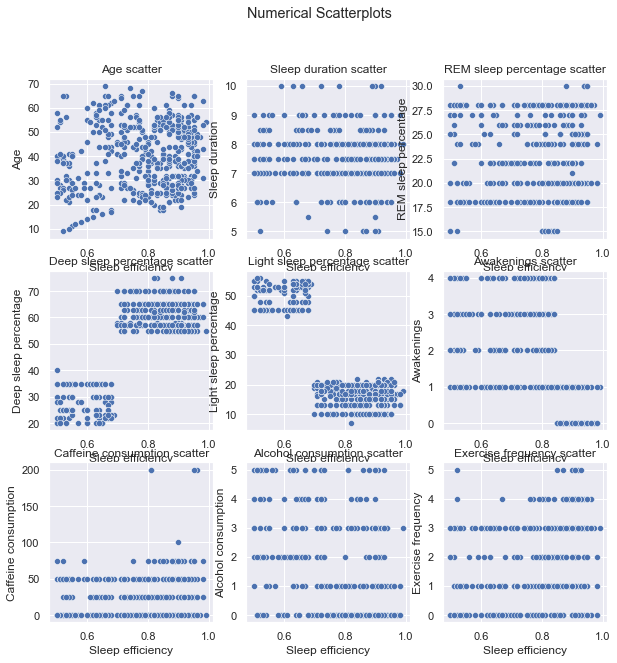

In [76]:
# numerical scatter

NUMERICAL = list(data.drop(TARGET, axis=1).select_dtypes(include='number').columns)
size = len(NUMERICAL)
NUMERICAL = [NUMERICAL[:3], NUMERICAL[3:6], NUMERICAL[6:]]

x = 3
y = size//x

fig, ax = plt.subplots(x,y, figsize=(10,10))
fig.suptitle('Numerical Scatterplots')

for i in range(x) :
    for j in range(y) :
        sns.scatterplot(x=data[TARGET] , y=data[NUMERICAL[i][j]], ax=ax[i][j]) # balanced
        ax[i][j].set_title(f'{NUMERICAL[i][j]} scatter')
    